In [1]:
%pip install pybullet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pybullet: filename=pybullet-3.2.7-cp312-cp312-linux_x86_64.whl size=99873170 sha256=a0a9f7fea3ac68f36290f21b70d1bcf0dad350b991bcddf54b6513a2af7d3407
  Stored in directory: /root/.cache/pip/wheels/72/95/1d/b336e5ee612ae9a019bfff4dc0bedd100ee6f0570db205fdf8
Successfully built pybullet


# sonnet help

In [5]:
import pybullet as p
import time
import numpy as np
import pybullet_data

class DroneEnvironment:
    def __init__(self):
        # Инициализация PyBullet
        p.connect(p.DIRECT)  # Используем GUI для визуализации
        p.setGravity(0, 0, -9.81)
        p.setRealTimeSimulation(0)


        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        # Загрузка плоскости
        self.plane = p.loadURDF("plane.urdf")

        # Загрузка дрона (временно используем простой куб как дрон)
        self.drone = p.loadURDF("cube.urdf", [0, 0, 1])

        # Создание цели (красная сфера)
        visual_shape_id = p.createVisualShape(
            shapeType=p.GEOM_SPHERE,
            radius=0.1,
            rgbaColor=[1, 0, 0, 1]
        )
        self.target = p.createMultiBody(
            baseMass=0,
            baseVisualShapeIndex=visual_shape_id,
            basePosition=[2, 2, 1]
        )

        # Настройка камеры
        self.setup_camera()

    def setup_camera(self):
        self.width = 320
        self.height = 200

    def get_camera_image(self):
        # Получение изображения с камеры дрона
        return p.getCameraImage(
            width=self.width,
            height=self.height,
            viewMatrix=p.computeViewMatrixFromYawPitchRoll(
                cameraTargetPosition=[0, 0, 0],
                distance=4,
                yaw=60,
                pitch=-10,
                roll=0,
                upAxisIndex=2
            ),
            projectionMatrix=p.computeProjectionMatrixFOV(
                fov=60,
                aspect=self.width/self.height,
                nearVal=0.01,
                farVal=100
            )
        )

    def step_simulation(self):
        p.stepSimulation()

    def get_drone_state(self):
        position, orientation = p.getBasePositionAndOrientation(self.drone)
        return position, orientation

    def get_target_position(self):
        return p.getBasePositionAndOrientation(self.target)[0]



In [6]:
env = DroneEnvironment()

# Простой тестовый цикл
for _ in range(1000):
  env.step_simulation()
  drone_pos, drone_orient = env.get_drone_state()
  print(f"Drone position: {drone_pos}")
  time.sleep(1/24.0)  # Симуляция с частотой 240 Гц

Drone position: (0.0, 0.0, 0.9998296875)
Drone position: (0.0, 0.0, 0.9994890920456699)
Drone position: (0.0, 0.0, 0.9989782454974581)
Drone position: (0.0, 0.0, 0.9982971820289033)
Drone position: (0.0, 0.0, 0.9974459381248215)
Drone position: (0.0, 0.0, 0.9964245525793674)
Drone position: (0.0, 0.0, 0.99523306649397)
Drone position: (0.0, 0.0, 0.9938715232751448)
Drone position: (0.0, 0.0, 0.9923399686321802)
Drone position: (0.0, 0.0, 0.9906384505746999)
Drone position: (0.0, 0.0, 0.9887670194101016)
Drone position: (0.0, 0.0, 0.9867257277408714)
Drone position: (0.0, 0.0, 0.9845146304617753)
Drone position: (0.0, 0.0, 0.9821337847569269)
Drone position: (0.0, 0.0, 0.9795832500967329)
Drone position: (0.0, 0.0, 0.9768630882347156)
Drone position: (0.0, 0.0, 0.9739733632042141)
Drone position: (0.0, 0.0, 0.9709141413149629)
Drone position: (0.0, 0.0, 0.9676854911495495)
Drone position: (0.0, 0.0, 0.9642874835597512)
Drone position: (0.0, 0.0, 0.9607201916627516)
Drone position: (0.0,

rgba shape=(1200, 1820, 4), dtype=uint8


/tmp/ipython-input-2842308737.py:30: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  display(Image.fromarray(rgba, 'RGBA'))


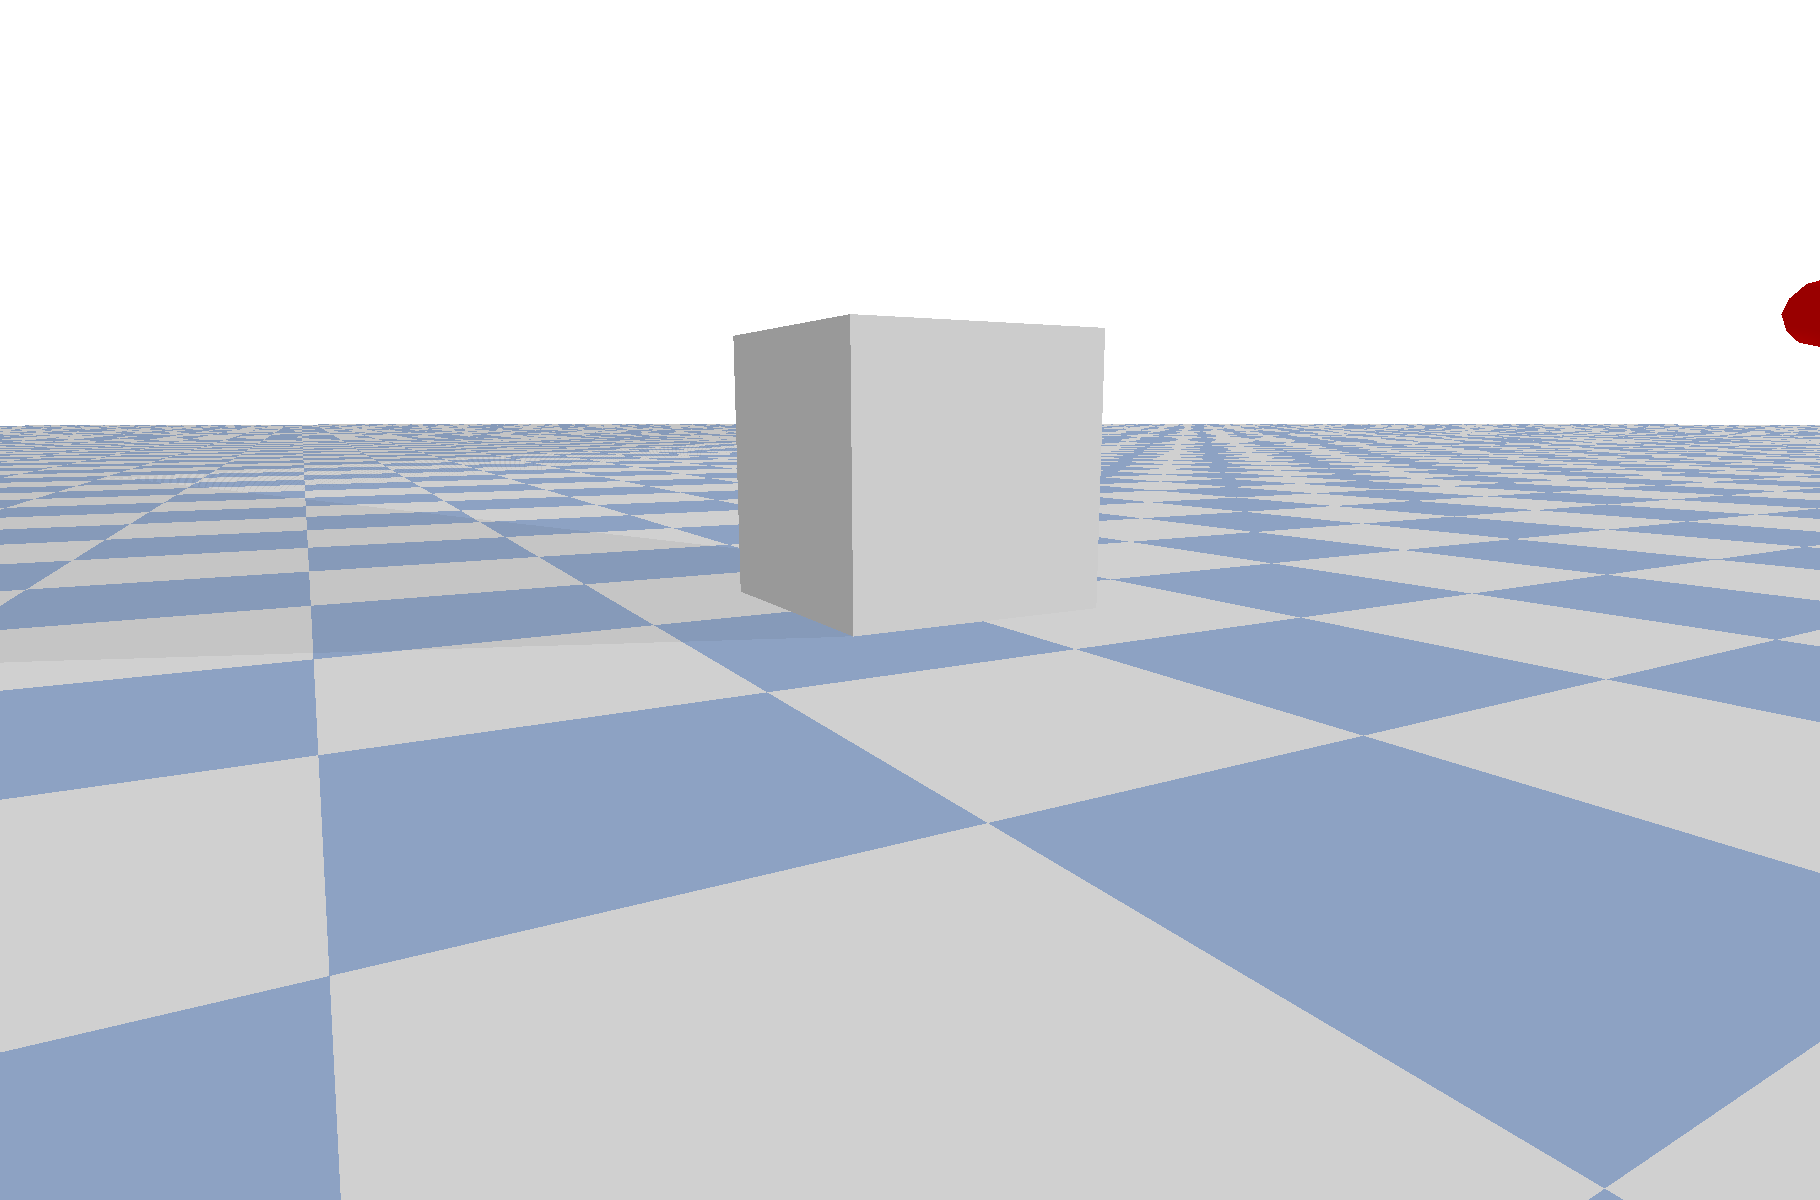

depth shape=(1200, 1820), dtype=float32, as values from 0.0 (near) to 1.0 (far)


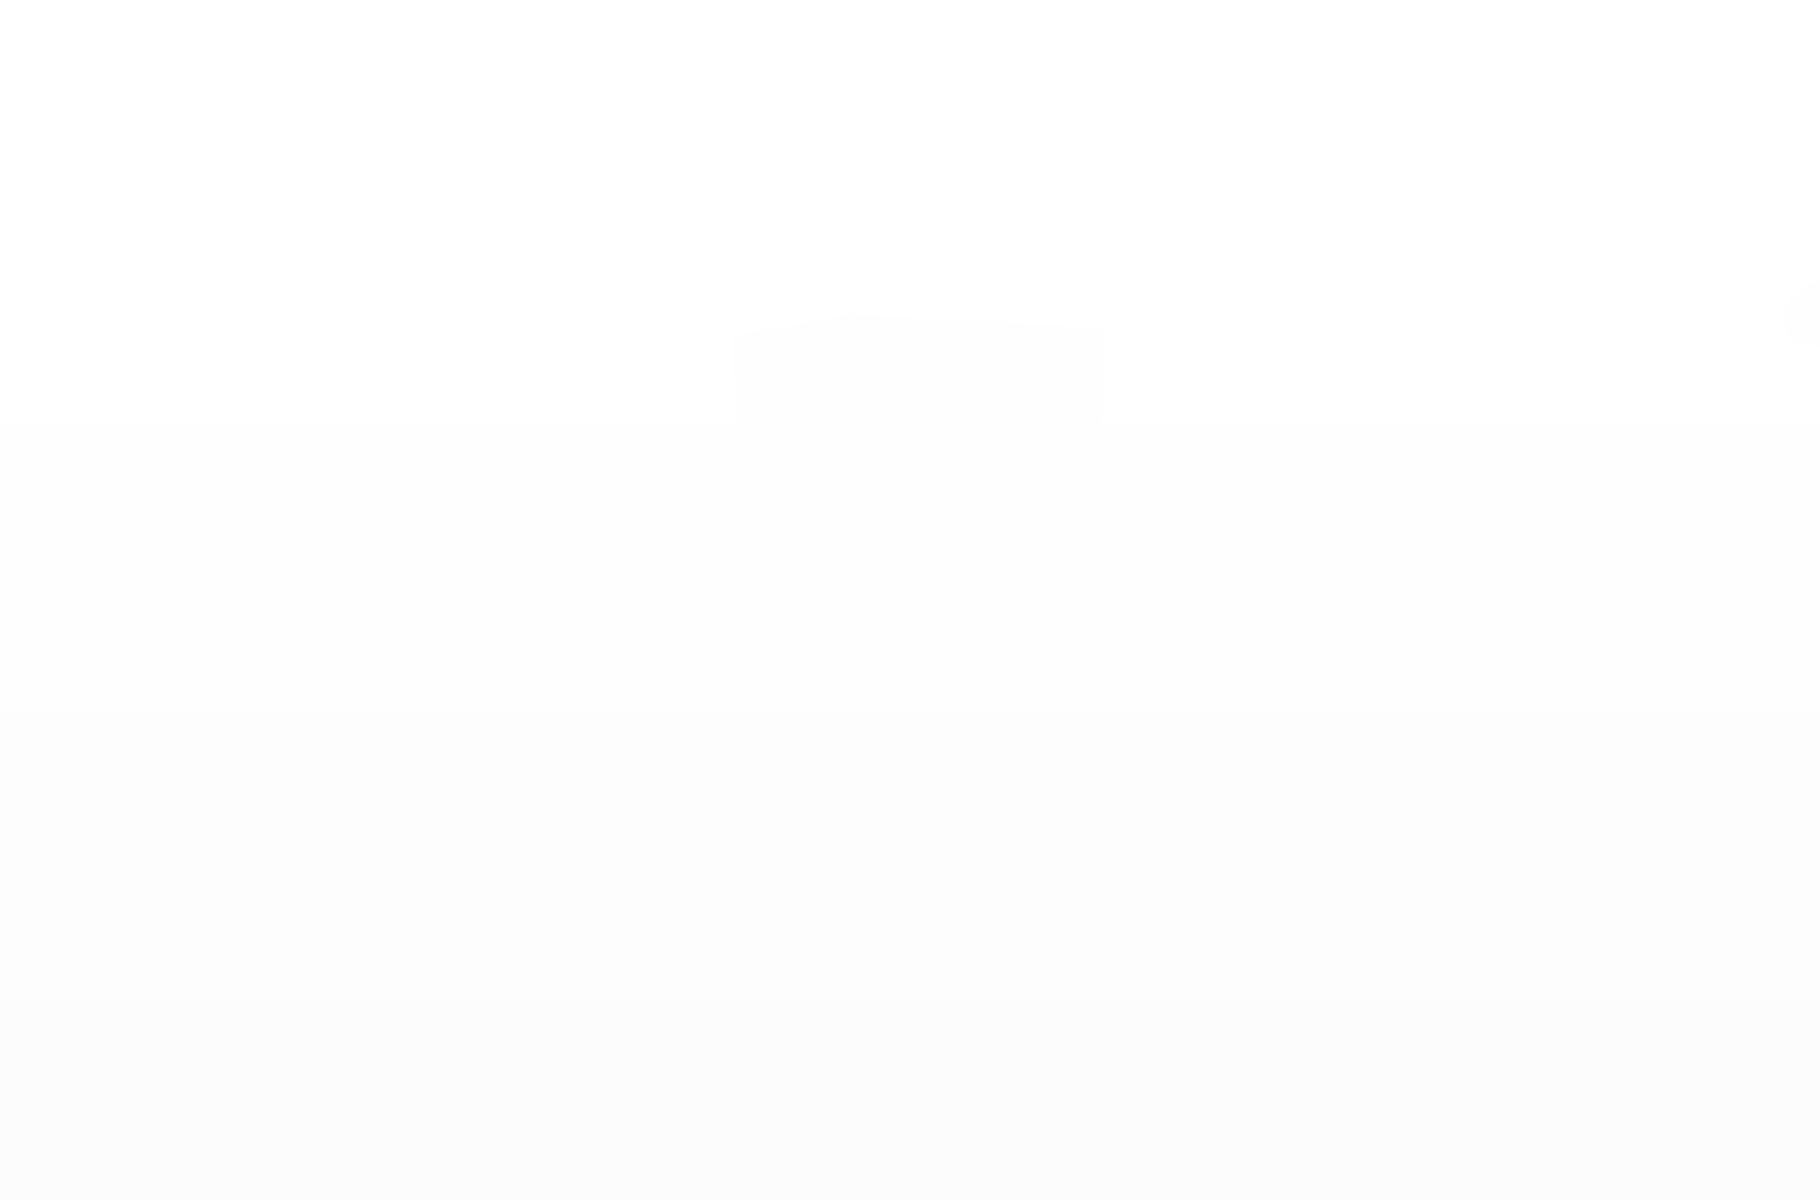

mask shape=(1200, 1820), dtype=int32, as unique values from 0 to N-1 entities, and -1 as None


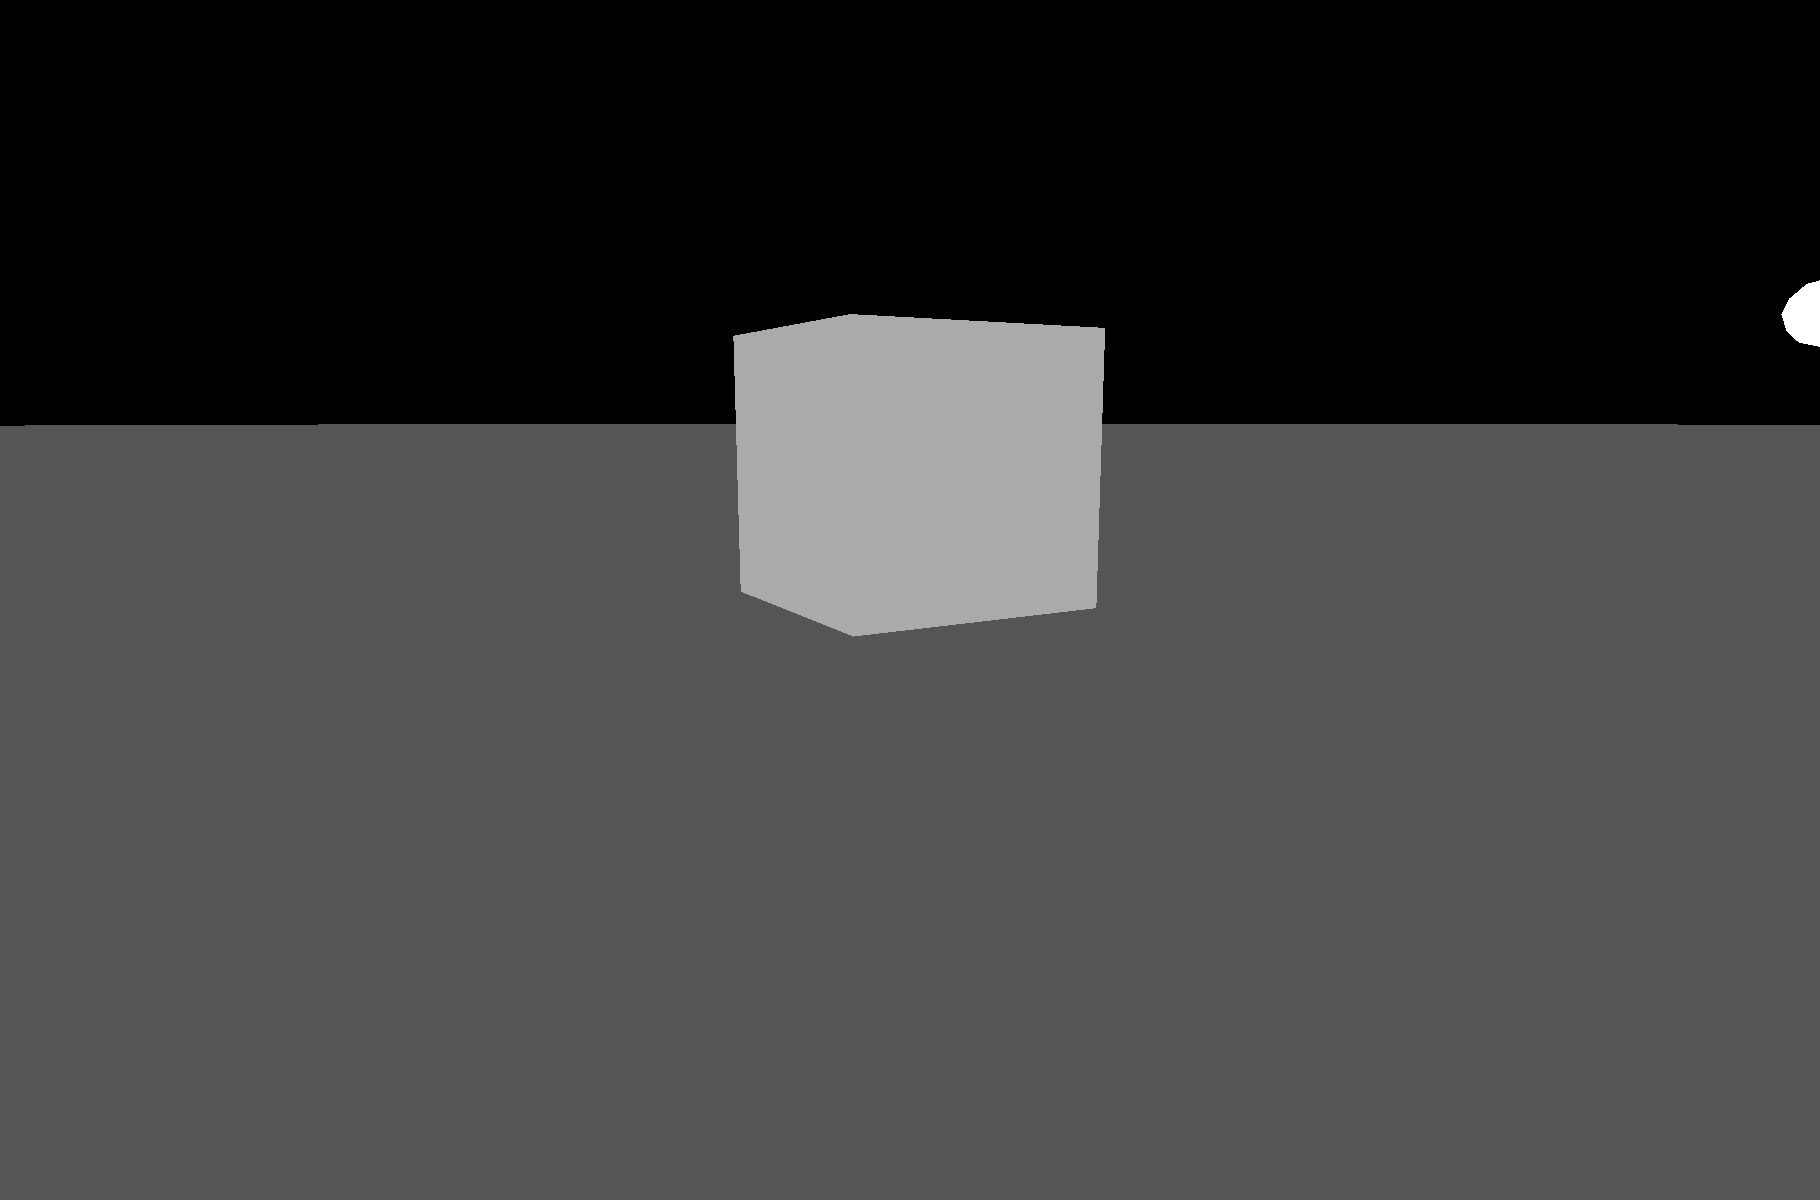

In [11]:
import numpy as np
from PIL import Image
from IPython.display import display

width = 1820
height = 1200
img_arr = p.getCameraImage(
    width,
    height,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0],
        distance=4,
        yaw=60,
        pitch=-10,
        roll=0,
        upAxisIndex=2,
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=width/height,
        nearVal=0.01,
        farVal=100,
    ),
    shadow=True,
    lightDirection=[1, 1, 1],
)

width, height, rgba, depth, mask = img_arr
print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
display(Image.fromarray(rgba, 'RGBA'))
print(f"depth shape={depth.shape}, dtype={depth.dtype}, as values from 0.0 (near) to 1.0 (far)")
display(Image.fromarray((depth*255).astype('uint8')))
print(f"mask shape={mask.shape}, dtype={mask.dtype}, as unique values from 0 to N-1 entities, and -1 as None")
display(Image.fromarray(np.interp(mask, (-1, mask.max()), (0, 255)).astype('uint8')))

# My


## подключение

In [6]:
import pybullet as p

p.connect(p.DIRECT)

1

## Создание мира

In [8]:
import pybullet as p
import pybullet_data as pd

print(pd.getDataPath())

p.setAdditionalSearchPath(pd.getDataPath())

/usr/local/lib/python3.12/dist-packages/pybullet_data


In [10]:
p.resetSimulation()
p.loadURDF("plane.urdf")

0

## фото